In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [3]:
import statsmodels.api as sm

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

/tmp/ipykernel_2135005/2644363921.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [9]:
import io
import requests

def read_csv_from_shareable_link(url):
  response = requests.get(url, stream=True)
  if response.status_code == 200:
    csv_file = io.StringIO(response.content.decode('utf-8'))
    return pd.read_csv(csv_file)
  else:
    print('Error reading CSV file from shareable link')

In [10]:
df = read_csv_from_shareable_link("https://drive.google.com/uc?export=download&id=1OPtTgTOIbJDITkJ-MzlhX1pGZ8KYUD-k")

In [11]:
df[df['CMEDV']>725].shape

(302, 16)

In [12]:
df.head()

,OBS.,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
0,1,715,0.26,18.0,2.31,0,1.97,6.58,6.2,4.10,1,296.0,15.3,0,0,0
1,2,691,0.28,0.0,7.07,0,3.64,6.42,62.0,2.19,2,242.1,17.8,1,1,1
2,3,822,0.30,0.0,7.07,0,1.67,7.19,84.6,3.65,2,242.0,17.8,1,1,0
3,4,809,0.21,0.0,2.18,0,1.40,7.00,47.2,1.13,3,222.0,18.7,0,0,1
4,5,837,0.26,0.0,2.18,0,0.37,7.15,89.8,3.50,3,222.0,18.7,1,0,1


In [13]:
df.columns 

Index(['OBS.', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'PARK', 'POOL', 'CINEMA'],
      dtype='object')

In [14]:
dataset= df.drop(columns=['OBS.'])

In [15]:
dataset.shape

(1000, 15)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CMEDV    1000 non-null   int64  
 1   CRIM     1000 non-null   float64
 2   ZN       1000 non-null   float64
 3   INDUS    1000 non-null   float64
 4   CHAS     1000 non-null   int64  
 5   NOX      1000 non-null   float64
 6   RM       1000 non-null   float64
 7   AGE      1000 non-null   float64
 8   DIS      1000 non-null   float64
 9   RAD      1000 non-null   int64  
 10  TAX      1000 non-null   float64
 11  PTRATIO  1000 non-null   float64
 12  PARK     1000 non-null   int64  
 13  POOL     1000 non-null   int64  
 14  CINEMA   1000 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 117.3 KB


In [17]:
dataset.describe()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,706.236000,0.458690,10.998500,10.865210,0.074000,3.059140,6.266140,70.500300,3.612240,9.698000,392.565600,18.683200,0.399000,0.330000,0.50000
std,69.644157,0.146198,23.033275,6.086324,0.261902,1.394702,0.544119,23.776112,1.751456,8.839283,147.757376,1.795277,0.489938,0.470448,0.50025
min,525.000000,0.130000,0.000000,0.460000,0.000000,0.000000,3.560000,2.900000,1.130000,1.000000,187.000000,12.600000,0.000000,0.000000,0.00000
25%,671.000000,0.357500,0.000000,6.060000,0.000000,2.020000,5.960000,53.800000,2.320000,4.000000,296.000000,17.800000,0.000000,0.000000,0.00000
50%,704.000000,0.440000,0.000000,8.560000,0.000000,2.960000,6.220000,76.700000,3.180000,5.000000,330.000000,19.100000,0.000000,0.000000,0.50000
75%,734.250000,0.550000,12.500000,18.100000,0.000000,3.832500,6.480000,90.700000,4.450000,24.000000,430.000000,20.200000,1.000000,1.000000,1.00000
max,975.000000,0.990000,100.000000,27.740000,1.000000,10.000000,8.780000,100.000000,12.130000,24.000000,711.000000,22.000000,1.000000,1.000000,1.00000


In [18]:
print('Null values per column : \n', dataset.isnull().sum())

Null values per column : 
 CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
PARK       0
POOL       0
CINEMA     0
dtype: int64


In [17]:
data = dataset.dropna()

In [18]:
dataset.describe()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,706.236000,0.458690,10.998500,10.865210,0.074000,3.059140,6.266140,70.500300,3.612240,9.698000,392.565600,18.683200,0.399000,0.330000,0.50000
std,69.644157,0.146198,23.033275,6.086324,0.261902,1.394702,0.544119,23.776112,1.751456,8.839283,147.757376,1.795277,0.489938,0.470448,0.50025
min,525.000000,0.130000,0.000000,0.460000,0.000000,0.000000,3.560000,2.900000,1.130000,1.000000,187.000000,12.600000,0.000000,0.000000,0.00000
25%,671.000000,0.357500,0.000000,6.060000,0.000000,2.020000,5.960000,53.800000,2.320000,4.000000,296.000000,17.800000,0.000000,0.000000,0.00000
50%,704.000000,0.440000,0.000000,8.560000,0.000000,2.960000,6.220000,76.700000,3.180000,5.000000,330.000000,19.100000,0.000000,0.000000,0.50000
75%,734.250000,0.550000,12.500000,18.100000,0.000000,3.832500,6.480000,90.700000,4.450000,24.000000,430.000000,20.200000,1.000000,1.000000,1.00000
max,975.000000,0.990000,100.000000,27.740000,1.000000,10.000000,8.780000,100.000000,12.130000,24.000000,711.000000,22.000000,1.000000,1.000000,1.00000


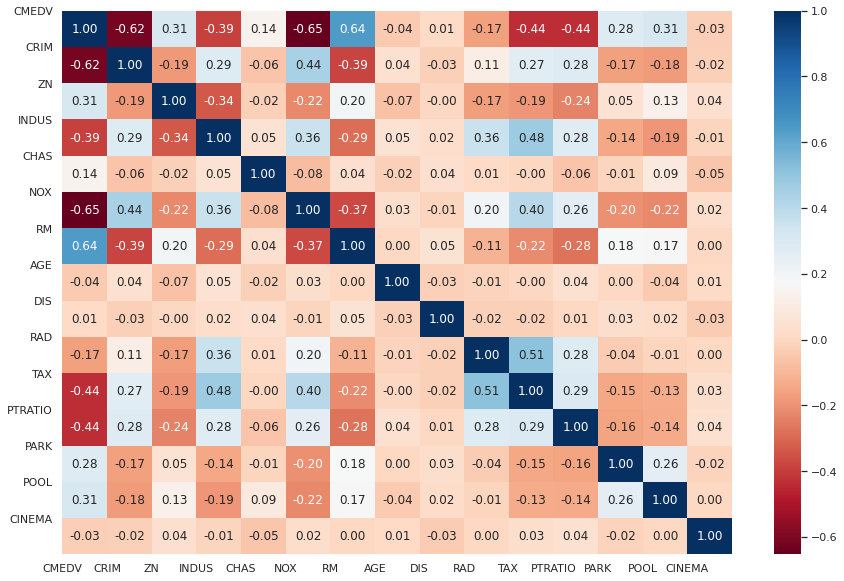

In [19]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(15, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.savefig('corr_plot.png')

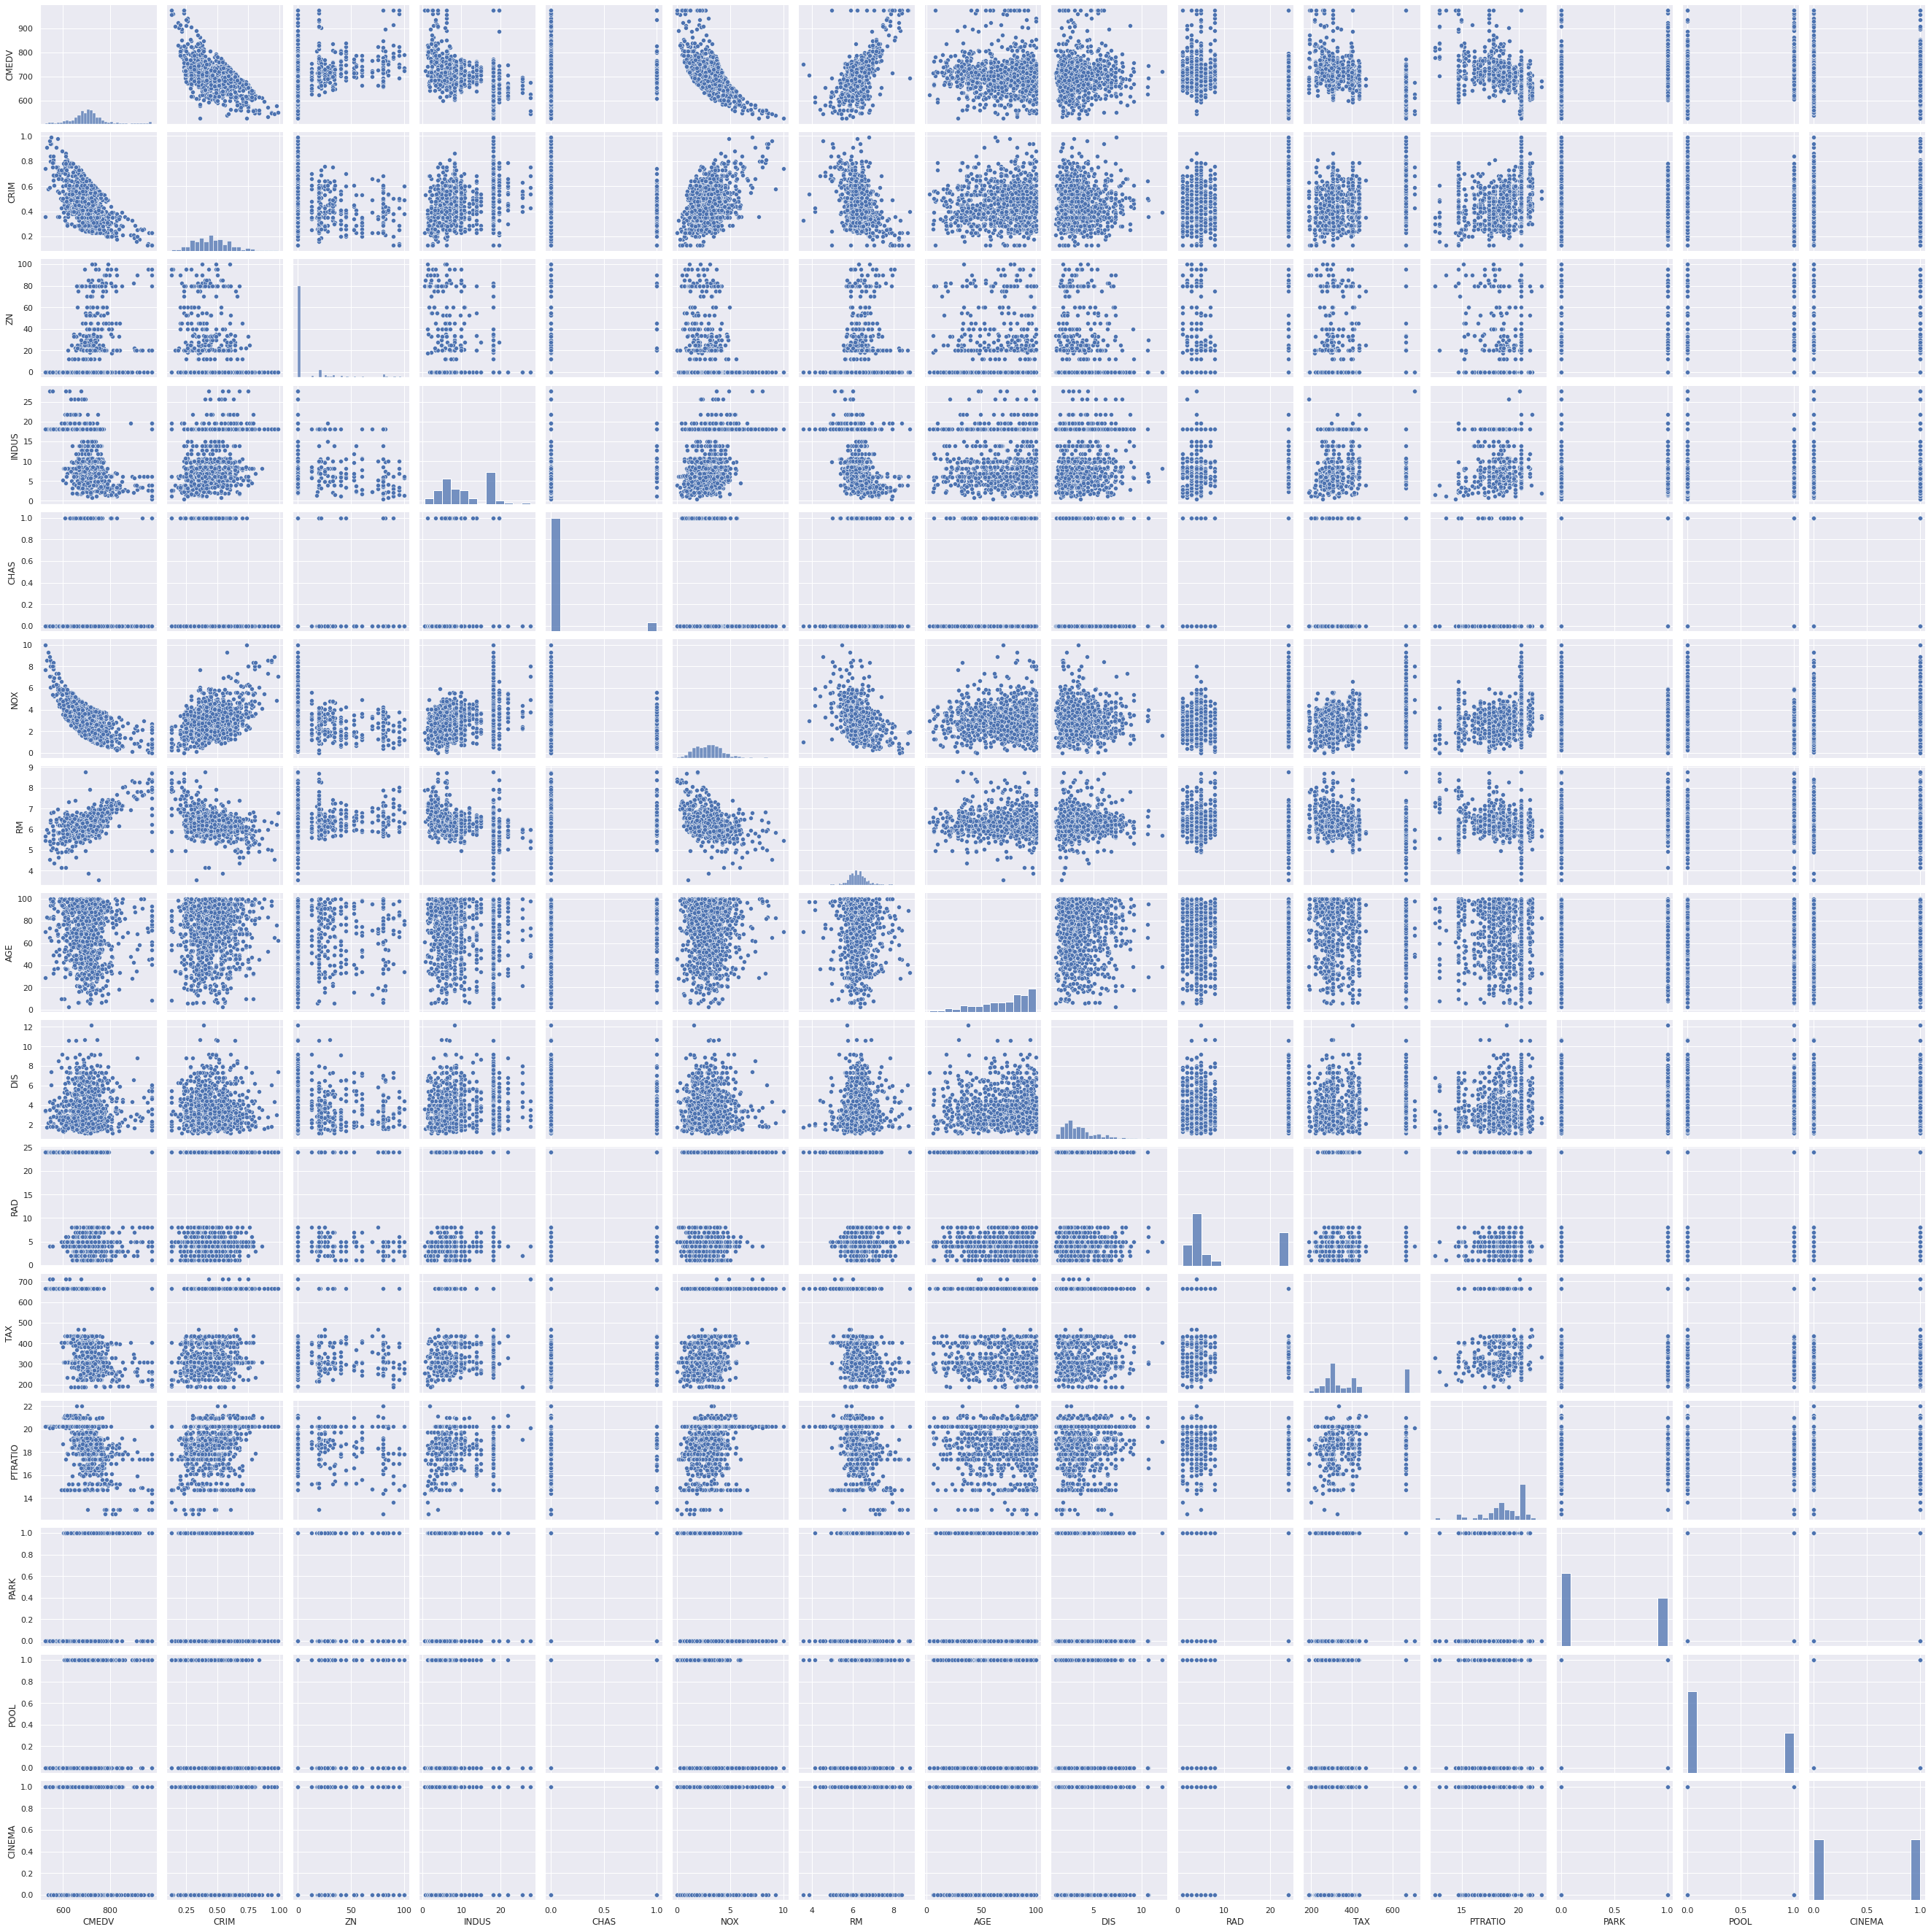

In [20]:
sns.pairplot(dataset)
plt.savefig("pairplot.png")

/users-2/billy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


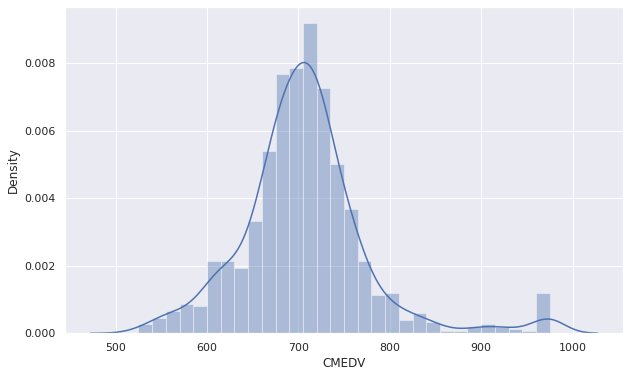

In [128]:
plt.figure(figsize=(10, 6))
sns.distplot(dataset['CMEDV'],bins=30)
plt.savefig("target_distribution")

In [24]:
# # Normalize the features
# for column in dataset.columns:
#     if column != 'CMEDV':
#         dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

# # Normalize the target
# dataset["CMEDV"] = (dataset['CMEDV'] - dataset["CMEDV"].mean()) / dataset["CMEDV"].std()
# # dataset["CMEDV"] = (dataset["CMEDV"] - dataset["CMEDV"].min()) / (dataset["CMEDV"].max() - dataset["CMEDV"].min())

# # Save the normalized data
# dataset.to_csv("normalized_data.csv")

In [129]:
y_classification = [1 if price > 725 else 0 for price in df["CMEDV"]]

/users-2/billy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


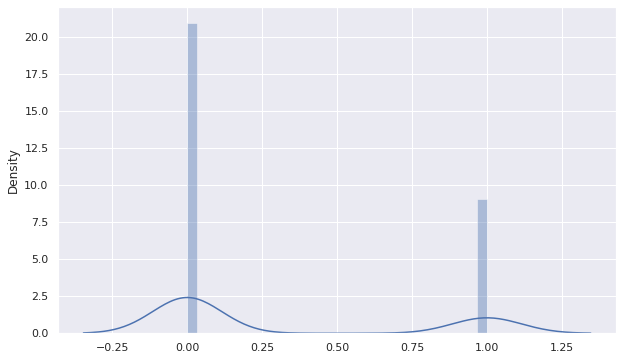

In [130]:

plt.figure(figsize=(10, 6))
sns.distplot(y_classification,bins=30)
plt.savefig("target_distribution_classification")

In [25]:
df_normilised = pd.read_csv("normalized_data.csv").drop(columns = ['Unnamed: 0'])

In [115]:
normalised_threshold = (725 - df["CMEDV"].mean()) / df["CMEDV"].std()
# thres =  (750 - df["CMEDV"].min()) / (df["CMEDV"].max() - df["CMEDV"].min())

In [116]:
df_normilised

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
0,0.125840,0.151163,0.18,0.067815,0.0,0.197,0.578544,0.033986,0.270000,0.000000,0.208015,0.287234,0.0,0.0,0.0
1,-0.218769,0.174419,0.00,0.242302,0.0,0.364,0.547893,0.608651,0.096364,0.043478,0.105153,0.553191,1.0,1.0,1.0
2,1.662221,0.197674,0.00,0.242302,0.0,0.167,0.695402,0.841401,0.229091,0.043478,0.104962,0.553191,1.0,1.0,0.0
3,1.475558,0.093023,0.00,0.063050,0.0,0.140,0.659004,0.456231,0.000000,0.086957,0.066794,0.648936,0.0,0.0,1.0
4,1.877602,0.151163,0.00,0.063050,0.0,0.037,0.687739,0.894954,0.215455,0.086957,0.066794,0.648936,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.413014,0.488372,0.20,0.350073,0.0,0.183,0.549808,0.952626,0.417273,0.173913,0.215649,0.510638,0.0,0.0,0.0
996,-0.319280,0.441860,0.00,0.646628,0.0,0.394,0.411877,0.603502,0.082727,1.000000,0.185115,0.808511,0.0,0.0,0.0
997,-0.218769,0.558140,0.28,0.700880,0.0,0.365,0.490421,0.514933,0.035455,0.130435,0.215649,0.808511,0.0,0.0,1.0
998,-0.060823,0.534884,0.00,0.281525,0.0,0.271,0.528736,0.262616,0.242727,0.173913,0.223282,0.808511,0.0,0.0,1.0


In [131]:
normalised_threshold

0.26942676589230646

In [118]:
# thres

In [119]:
df_normilised.describe()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.421085e-16,0.382198,0.109985,0.381423,0.074000,0.305914,0.518418,0.696193,0.225658,0.378174,0.392301,0.647149,0.399000,0.330000,0.50000
std,1.000000e+00,0.169997,0.230333,0.223106,0.261902,0.139470,0.104237,0.244862,0.159223,0.384317,0.281980,0.190987,0.489938,0.470448,0.50025
min,-2.602315e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-5.059434e-01,0.264535,0.000000,0.205279,0.000000,0.202000,0.459770,0.524202,0.108182,0.130435,0.208015,0.553191,0.000000,0.000000,0.00000
50%,-3.210607e-02,0.360465,0.000000,0.296921,0.000000,0.296000,0.509579,0.760041,0.186364,0.173913,0.272901,0.691489,0.000000,0.000000,0.50000
75%,4.022448e-01,0.488372,0.125000,0.646628,0.000000,0.383250,0.559387,0.904222,0.301818,1.000000,0.463740,0.808511,1.000000,1.000000,1.00000
max,3.859103e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
data =df_normilised

In [134]:
X = data.drop(['CMEDV'], axis = 1)
target_value = data['CMEDV']

In [135]:
cat = X.select_dtypes(include='O').keys()
X_new = pd.get_dummies(X, columns = cat, drop_first=True)

In [136]:
# target_value.describe()

In [137]:
print(cat)
print(X_new.shape)

Index([], dtype='object')
(1000, 14)


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                    target_value,
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                  )

In [139]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [140]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7219157364395068
R2_score (train):  0.7552015313825623
R2_score (test):  0.7145356971752794
RMSE:  0.5638697920985226


In [141]:
# regressor_linear.summary()

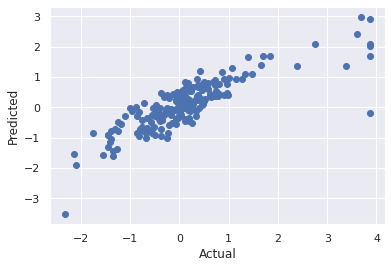

In [142]:
plt.scatter(y_test, y_pred_linear_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()



In [143]:
from sklearn.feature_selection import f_regression

In [144]:
# Get the coefficients
coefficients = regressor_linear.coef_

# Get the intercept
intercept = regressor_linear.intercept_

# Print the coefficients
# print("Coefficients:")
# for feature, coefficient in zip(X.columns, coefficients):
#     print(f"{feature}: {coefficient}")

# # Print the intercept
# print("Intercept:", intercept)

# Calculate the p-values
f_values, p_values = f_regression(X_train,y_train)

# # Print the p-values
# print("P-values:")
# for feature, p_value in zip(X.columns, p_values):
#     print(f"{feature}: {p_value}")

In [145]:
# Print the coefficients, t-stats, and p-values
print("Feature\tCoefficient\tT-statistic\tP-value")
for feature, coefficient, p_value in zip(X.columns, coefficients, p_values):
    # Calculate the standard error
    residual_sum_of_squares = np.sum((regressor_linear.predict(X_train) - y_train) ** 2)
    standard_error = np.sqrt(residual_sum_of_squares / (len(y_train) - len(X_train.columns) - 1))
    
    # Calculate the t-statistic
    t_statistic = coefficient / standard_error
    
    print(f"{feature}\t{coefficient:.4f}\t\t{t_statistic:.4f}\t\t{p_value:.4f}")

Feature	Coefficient	T-statistic	P-value
CRIM	-1.4299		-2.9127		0.0000
ZN	0.3631		0.7397		0.0000
INDUS	0.0620		0.1264		0.0000
CHAS	0.2778		0.5658		0.0000
NOX	-2.0339		-4.1430		0.0000
RM	3.1443		6.4049		0.0000
AGE	0.0137		0.0279		0.3000
DIS	-0.0930		-0.1895		0.7099
RAD	0.2334		0.4754		0.0000
TAX	-0.5691		-1.1593		0.0000
PTRATIO	-0.7350		-1.4972		0.0000
PARK	0.1386		0.2823		0.0000
POOL	0.1425		0.2902		0.0000
CINEMA	-0.0461		-0.0940		0.4605


In [146]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Make predictions on the training set
y_pred_train = regressor_linear.predict(X_train)

# Calculate R-squared
r2 = r2_score(y_train, y_pred_train)

# Calculate adjusted R-squared
n = len(y_train)
p = X_train.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_train, y_pred_train)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_train, y_pred_train)

# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.7552015313825623
Adjusted R-squared: 0.7508356988212321
Mean Squared Error (MSE): 0.2364808032485869
Mean Absolute Error (MAE): 0.3432120762404296


In [147]:

# Make predictions on the training set
y_pred_test = regressor_linear.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.7145356971752794
Adjusted R-squared: 0.692932993177733
Mean Squared Error (MSE): 0.3179491424412311
Mean Absolute Error (MAE): 0.3706096394550555


In [148]:
residuals_test = y_test - y_pred_test

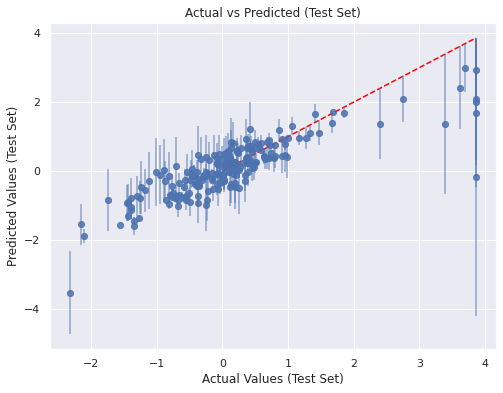

In [149]:
# Plot the actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)

# Add a diagonal line for reference
max_value = max(y_test.max(), y_pred_test.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

# Add error bars on the test set
plt.errorbar(y_test, y_pred_test, yerr=residuals_test, fmt='o', alpha=0.6)

# Set axis labels and title
plt.xlabel("Actual Values (Test Set)")
plt.ylabel("Predicted Values (Test Set)")
plt.title("Actual vs Predicted (Test Set)")

# Show the plot
plt.savefig("lr_actual_pred_fig.png")

In [151]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Model Performance on Test Set:")
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Model Performance on Test Set:
R-squared: 0.7145356971752794
Adjusted R-squared: 0.692932993177733
Mean Squared Error (MSE): 0.3179491424412311
Mean Absolute Error (MAE): 0.3706096394550555


Model Performance on Test Set:
R-squared: 0.715
Adjusted R-squared: 0.693
Mean Squared Error (MSE): 0.318
Mean Absolute Error (MAE): 0.371

Model Performance on Training Set:
R-squared: 0.755
Adjusted R-squared: 0.751
Mean Squared Error (MSE): 0.236
Mean Absolute Error (MAE): 0.343

The R-squared value represents the proportion of the variance in the target variable that can be explained by the model. In the case of the test set, the R-squared is 0.715, indicating that approximately 71.5% of the variance in the target variable can be explained by the features in the model.

The Adjusted R-squared takes into account the number of features and the sample size to provide a more conservative estimate of the model's performance. The Adjusted R-squared for the test set is 0.693, which considers the complexity of the model and penalizes overfitting.

The Mean Squared Error (MSE) represents the average of the squared differences between the predicted and actual values. A lower MSE indicates better model performance. In this case, the MSE on the test set is 0.318.

The Mean Absolute Error (MAE) represents the average of the absolute differences between the predicted and actual values. It provides a measure of the average magnitude of the errors. A lower MAE indicates better model performance. In this case, the MAE on the test set is 0.371.

Overall, the model shows reasonably good performance on both the training and test sets. It explains a significant portion of the variance in the target variable, as indicated by the R-squared values. The mean squared error and mean absolute error are relatively low, suggesting that the model's predictions are close to the actual values. However, it's important to interpret these results in the context of the specific problem and domain knowledge.


Cinama and age, and DIS.. have higher p-values and rest have p values cost to zero, passing the null hypotesis test and their t-stat is hight that 1.96 (comment on this)

In [289]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [290]:
y_pred_test_classification = [1 if price > normalised_threshold else 0 for price in y_pred_test]
y_test_classification = [1 if price > normalised_threshold else 0 for price in y_test]

# Calculate classification accuracy
accuracy = accuracy_score(y_test_classification,y_pred_test_classification)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test_classification, y_pred_test_classification)

# Print the classification accuracy and confusion matrix
print("Classification Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Classification Accuracy: 0.825
Confusion Matrix:
[[109  23]
 [ 12  56]]


/users-2/billy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

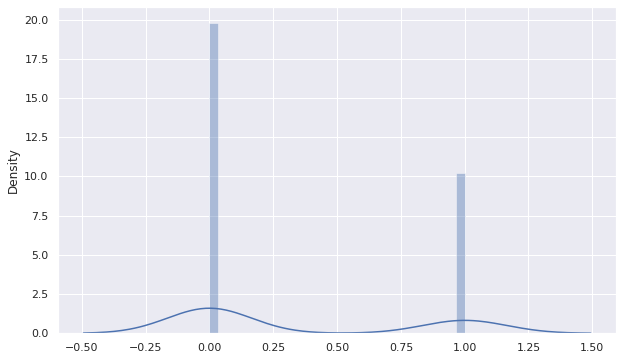

In [291]:
plt.figure(figsize=(10, 6))
sns.distplot(y_test_classification,bins=30)

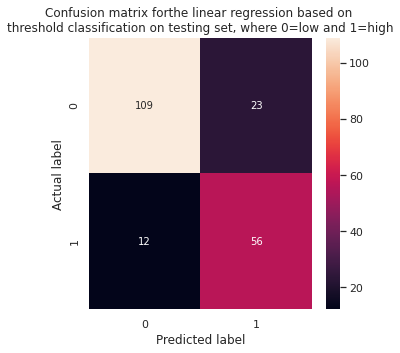

In [292]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.title(f"Confusion matrix forthe linear regression based on \nthreshold classification on testing set, where 0=low and 1=high")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('lr_conf_matrix.png')

In [293]:
# y_test_classification = [1 if price > normalised_threshold else 0 for price in y_train]

In [294]:
# len(y_test_classification)

In [295]:
(np.array(y_test_classification)==1).sum()

68

In [296]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
# Calculate accuracy
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)

# Calculate precision
precision = precision_score(y_test_classification, y_pred_test_classification, pos_label=1)

# Calculate recall
recall = recall_score(y_test_classification, y_pred_test_classification, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test_classification, y_pred_test_classification, pos_label=1)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_classification, np.array(y_pred_test_classification)==1)

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test_classification, y_pred_test_classification)

# Print the additional metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Matthews Correlation Coefficient:", mcc)

Accuracy: 0.825
Precision: 0.7088607594936709
Recall: 0.8235294117647058
F1 Score: 0.761904761904762
ROC AUC Score: 0.8246434937611408
Matthews Correlation Coefficient: 0.6291756266483216


In [299]:
classification_rep_gb = classification_report(y_test_classification, y_pred_test_classification)

In [301]:
print(classification_rep_gb)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       132
           1       0.71      0.82      0.76        68

    accuracy                           0.82       200
   macro avg       0.80      0.82      0.81       200
weighted avg       0.84      0.82      0.83       200



Accuracy: 0.825

The accuracy score represents the overall correctness of the classification. In this case, the model achieves an accuracy of 82.5%, indicating that approximately 82.5% of the predictions made by the model match the actual labels in the test dataset.
Precision: 0.7088607594936709

Precision measures the proportion of correctly predicted high median house prices (positive class) out of the total predicted high prices. A precision score of 0.708 implies that out of all the instances predicted as high median house prices, approximately 70.89% of them are correctly classified.
Recall: 0.8235294117647058

Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted high median house prices out of the actual high prices. A recall score of 0.823 suggests that the model captures approximately 82.35% of the actual high median house prices.
F1 Score: 0.761904761904762

The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. An F1 score of 0.762 indicates a trade-off between precision and recall, taking into account both the ability to correctly identify high median house prices and the ability to avoid false positives.
ROC AUC Score: 0.8246434937611408

The ROC AUC (Receiver Operating Characteristic Area Under Curve) score represents the model's ability to distinguish between high and low median house prices. A score of 0.825 suggests that the model performs well in distinguishing between the two classes, with an area under the ROC curve of approximately 82.46%.
Matthews Correlation Coefficient: 0.6291756266483216

The Matthews correlation coefficient (MCC) takes into account true positives, true negatives, false positives, and false negatives, providing an overall measure of classification performance. A MCC score of 0.629 indicates a moderate level of agreement between the predicted and actual classifications.
Overall, the results suggest that the model has reasonably good performance, with relatively high accuracy, precision, recall, F1 score, and ROC AUC score. However, it's important to consider the specific problem and context to fully interpret the meaning and significance of these metrics.

In [298]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

print(classification_report(y_test_classification, y_pred_test_classification))

In [ ]:
coefficients_lr = regressor_linear.coef_
feature_names_lr = X.columns

# Create a DataFrame for feature importance
feature_importance_df_lr = pd.DataFrame({'Feature': feature_names_lr, 'Importance': coefficients_lr})

# Sort the DataFrame by importance score
feature_importance_df_lr = feature_importance_df_lr.sort_values('Importance', ascending=False)

# Plot feature importance for linear regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_lr)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_improtance_linear_regression.png')

In [106]:
y_train_classification = [1 if price > normalised_threshold else 0 for price in y_train]

In [92]:
# !pip install xgboost

In [ ]:
# regressor

In [181]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

params ={'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 300,
'reg_lambda': 1.5,
 'random_state': 42,
 'subsample': 0.7}

# Create the XGBoost regression model
regressor_gb = xgb.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42)

# Fit the model on the training set
regressor_gb.fit(X_train, y_train)





XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [182]:
from sklearn.model_selection import cross_validate

In [183]:
# Make predictions on the test set
y_pred_train_regression = regressor_gb.predict(X_train)
# Evaluate the regression model
mse = mean_squared_error(y_train, y_pred_train_regression)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_train, y_pred_train_regression)
r2 = r2_score(y_train, y_pred_train_regression)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Squared Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.033765451822405194
Mean Squared Error (MSE): 0.14101659413422837
R-squared (R2) Score: 0.9650469264957131


In [185]:
# Make predictions on the test set
y_pred_test_regression = regressor_gb.predict(X_test)
# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred_test_regression)
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test_regression)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Squared Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.11937885410182872
Mean Squared Error (MAE): 0.3706096394550555
R-squared (R2) Score: 0.8928180743104488


In [101]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the XGBoost regression model
regressor_gb = xgb.XGBRegressor(gpu_id=1)

# Perform cross-validation on the training set
scoring = {'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error', 'r2': 'r2'}
cv_results = cross_validate(regressor_gb, X_train, y_train, cv=5, scoring=scoring)

# Extract the mean scores
mean_mse = -cv_results['test_mse'].mean()
mean_mae = -cv_results['test_mae'].mean()
mean_r2 = cv_results['test_r2'].mean()



In [188]:
# Get feature importance
feature_importance = regressor_gb.feature_importances_

# Print feature importance
print("Feature Importance for XGBoost Regression:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance for XGBoost Regression:
CRIM: 0.15269890427589417
ZN: 0.03422653302550316
INDUS: 0.05857203155755997
CHAS: 0.04013447463512421
NOX: 0.15179945528507233
RM: 0.224645733833313
AGE: 0.011373109184205532
DIS: 0.010631565004587173
RAD: 0.03438657522201538
TAX: 0.07192079722881317
PTRATIO: 0.0577826090157032
PARK: 0.05131763592362404
POOL: 0.08774468302726746
CINEMA: 0.012765939347445965


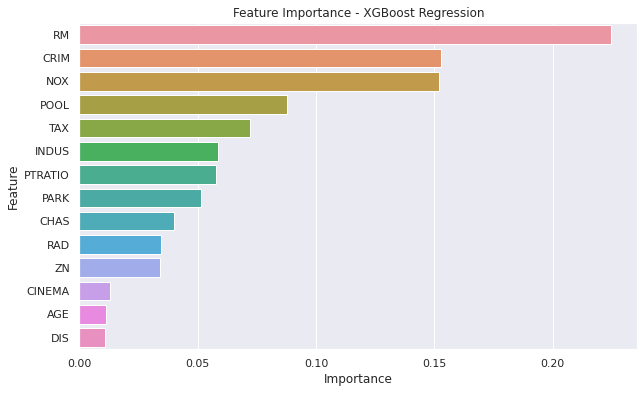

In [187]:
feature_importance_reg = regressor_gb.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_reg = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_reg})

# Sort the DataFrame by importance score
feature_importance_df_reg = feature_importance_df_reg.sort_values('Importance', ascending=False)

# Plot feature importance for regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_reg)
plt.title('Feature Importance - XGBoost Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('gb_regressor_feaure_improtance.png')

In [113]:
# the classifier

In [108]:
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create the XGBoost classifier model
classifier_gb = xgb.XGBClassifier(gpu_id=1)

# Perform cross-validation on the training set for each metric
scoring = {'accuracy': 'accuracy', 'precision': 'precision_macro', 'recall': 'recall_macro', 'f1': 'f1_macro', 'roc_auc': 'roc_auc_ovr'}
cv_results = cross_validate(classifier_gb, X_train, y_train_classification, cv=10, scoring=scoring)



In [109]:
# Extract the mean scores
mean_accuracy = cv_results['test_accuracy'].mean()
mean_precision = cv_results['test_precision'].mean()
mean_recall = cv_results['test_recall'].mean()
mean_f1 = cv_results['test_f1'].mean()
mean_roc_auc = cv_results['test_roc_auc'].mean()

In [110]:
# Train the chosen model on the standard dataset
classifier_gb.fit(X_train, y_train_classification)

# Make predictions on the test set
y_pred_test_classification = classifier_gb.predict(X_test)

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)
precision = precision_score(y_test_classification, y_pred_test_classification, average='macro')
recall = recall_score(y_test_classification, y_pred_test_classification, average='macro')
f1 = f1_score(y_test_classification, y_pred_test_classification, average='macro')
roc_auc = roc_auc_score(y_test_classification, y_pred_test_classification)

# Print the evaluation metrics
print("Cross-Validation Metrics:")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1 Score:", mean_f1)
print("ROC AUC Score:", mean_roc_auc)
print("\nEvaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Cross-Validation Metrics:
Accuracy: 0.85125
Precision: 0.8266808039807232
Recall: 0.8080793015146561
F1 Score: 0.814864912591393
ROC AUC Score: 0.9148932112890922

Evaluation Metrics on Test Set:
Accuracy: 0.83
Precision: 0.8094618055555556
Recall: 0.8177361853832442
F1 Score: 0.8131868131868132
ROC AUC Score: 0.8177361853832442


In [194]:
y_pred_test_classification = [1 if price > normalised_threshold else 0 for price in y_pred_test_regression] # using the regressor 


In [281]:
# y_pred_test_classification = [1 if price > normalised_threshold else 0 for price in y_pred_test_regression] # using the regressor 

In [195]:
# y_pred_test_classification = [1 if price > normalised_threshold else 0 for price in y_pred_test_regression] # using the regressor 
# Make predictions on the test set
# y_pred_test_classification = classifier_gb.predict(X_test)
# Evaluate the classifier model
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)
precision = precision_score(y_test_classification, y_pred_test_classification, pos_label=1)
recall = recall_score(y_test_classification, y_pred_test_classification, pos_label=1)
f1 = f1_score(y_test_classification, y_pred_test_classification, pos_label=1)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.84
Precision: 0.7571428571428571
Recall: 0.7794117647058824
F1 Score: 0.7681159420289856


In [196]:
# Calculate classification accuracy
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test_classification, y_pred_test_classification)

# Print the classification accuracy and confusion matrix
print("Classification Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Classification Accuracy: 0.84
Confusion Matrix:
[[115  17]
 [ 15  53]]


Text(0.5, 21.5, 'Predicted label')

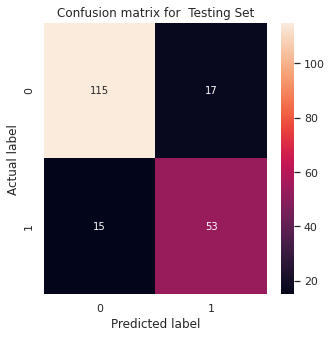

In [197]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format(' Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

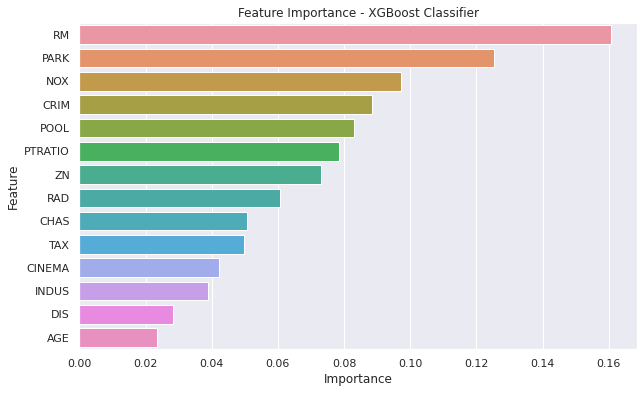

In [287]:
# Get feature importance
feature_importance_clf = classifier_gb.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_clf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_clf})

# Sort the DataFrame by importance score
feature_importance_df_clf = feature_importance_df_clf.sort_values('Importance', ascending=False)

# Plot feature importance for classification
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_clf)
plt.title('Feature Importance - XGBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [298]:
from sklearn.metrics import classification_report, confusion_matrix

In [316]:
from scipy import stats

In [321]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=classifier_gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training set
grid_search_gb.fit(X_train, y_train_classification)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]},
             scoring='accuracy')

In [322]:
# Get the best parameters and best estimator
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_test_classification_gb = best_estimator_gb.predict(X_test)

# Calculate predicted probabilities for ROC AUC score
y_pred_proba_test_gb = best_estimator_gb.predict_proba(X_test)[:, 1]

# Evaluate the classifier model
accuracy_gb = accuracy_score(y_test_classification, y_pred_test_classification_gb)
precision_gb = precision_score(y_test_classification, y_pred_test_classification_gb)
recall_gb = recall_score(y_test_classification, y_pred_test_classification_gb)
f1_gb = f1_score(y_test_classification, y_pred_test_classification_gb)
roc_auc_gb = roc_auc_score(y_test_classification, y_pred_proba_test_gb)
classification_rep_gb = classification_report(y_test_classification, y_pred_test_classification_gb)

# Print the evaluation metrics and best parameters
print("Gradient Boosting Classifier - Best Parameters:")
print(best_params_gb)
print("\nEvaluation Metrics - Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
print("ROC AUC Score:", roc_auc_gb)
print("\nClassification Report - Gradient Boosting Classifier:")
print(classification_rep_gb)

Gradient Boosting Classifier - Best Parameters:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}

Evaluation Metrics - Gradient Boosting Classifier:
Accuracy: 0.865
Precision: 0.7971014492753623
Recall: 0.8088235294117647
F1 Score: 0.8029197080291971
ROC AUC Score: 0.9281417112299466

Classification Report - Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       132
           1       0.80      0.81      0.80        68

    accuracy                           0.86       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.87      0.86      0.87       200



In [323]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Gradient Boosting Regressor
regressor_gb = GradientBoostingRegressor()

# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

In [325]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=regressor_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training set
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

In [333]:
# XGB

In [336]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Create the XGBoost Classifier
classifier_xgb = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'random_state': [42]
}


In [ ]:
# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=classifier_xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training set
grid_search_xgb.fit(X_train, y_train_classification)



In [ ]:
# Get the best parameters and best estimator
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_test_classification_xgb = best_estimator_xgb.predict(X_test)

# Calculate predicted probabilities for ROC AUC score
y_pred_proba_test_xgb = best_estimator_xgb.predict_proba(X_test)[:, 1]

# Evaluate the classifier model
accuracy_xgb = accuracy_score(y_test_classification, y_pred_test_classification_xgb)
precision_xgb = precision_score(y_test_classification, y_pred_test_classification_xgb)
recall_xgb = recall_score(y_test_classification, y_pred_test_classification_xgb)
f1_xgb = f1_score(y_test_classification, y_pred_test_classification_xgb)
roc_auc_xgb = roc_auc_score(y_test_classification, y_pred_proba_test_xgb)
classification_rep_xgb = classification_report(y_test_classification, y_pred_test_classification_xgb)

# Print the evaluation metrics and best parameters
print("XGBoost Classifier - Best Parameters:")
print(best_params_xgb)
print("\nEvaluation Metrics - XGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("ROC AUC Score:", roc_auc_xgb)
print("\nClassification Report - XGBoost Classifier:")
print(classification_rep_xgb)

In [1]:
# gpu_ids = [2, 3]  # Example: Using GPU devices 0, 1, 2, 3

# # Set the XGBoost parameters
# params = {
#     'tree_method': 'gpu_hist',
#     'gpu_id': ','.join(str(gpu_id) for gpu_id in gpu_ids)
#     # Other XGBoost parameters...
# }

In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set the XGBoost parameters
params = {
    'tree_method': 'gpu_hist',
    'gpu_id': '0,1'  # Specify the GPU device IDs to be used
    # Other XGBoost parameters...
}

# Create the XGBoost Regressor
regressor_xgb = XGBRegressor(tree_method='gpu_hist', gpu_id=3)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1, 0.2],
    'random_state': [42]
}

# Specify the scoring metrics for evaluation
scoring = {'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error', 'r2': 'r2'}

# Create GridSearchCV
grid_search_xgb = GridSearchCV(estimator=regressor_xgb, param_grid=param_grid_xgb, cv=5, scoring=scoring, refit='mse')


In [46]:
# Fit the GridSearchCV on the training set
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=3,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5], 'min_child_weight': [1, 3],
                         'n_estimators': [200, 300], 'random_state': [42],
                         'subsample': [0.7, 1.0]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error', 'r2': 'r2'})

In [47]:
# Access the best estimator and best parameters
best_estimator_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_

# Make predictions using the best estimator
y_pred_regression = best_estimator_xgb.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_regression)
mae = mean_absolute_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.12203316245616502
Mean Absolute Error (MAE): 0.28198487559785723
R-squared (R2) Score: 0.8904349564380913


In [49]:
best_params_xgb

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'random_state': 42,
 'subsample': 0.7}

In [61]:
# y_pred_regression

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

In [57]:
# y_test_classification = [1 if price > normalised_threshold else 0 for price in y_test]

In [53]:
#  y_pred_test_classification = [1 if price > normalised_threshold else 0 for price in y_pred_regression] # using the regressor 


In [62]:
# Make predictions on the test set
# y_pred_test_classification = classifier_gb.predict(X_test)
# Evaluate the classifier model
# accuracy = accuracy_score(y_test_classification, y_pred_test_classification)
# precision = precision_score(y_test_classification, y_pred_test_classification, pos_label=1)
# recall = recall_score(y_test_classification, y_pred_test_classification, pos_label=1)
# f1 = f1_score(y_test_classification, y_pred_test_classification, pos_label=1)

# # Print the evaluation metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [63]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set the XGBoost parameters
params = {
    'tree_method': 'gpu_hist',
    'gpu_id': '0,1'  # Specify the GPU device IDs to be used
    # Other XGBoost parameters...
}

# Create the XGBoost Regressor
regressor_xgb = XGBRegressor(tree_method='gpu_hist', gpu_id=3)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [400, 600],
    'learning_rate': [0.05, 0.01],
    'max_depth': [1, 3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 8.0],
    'colsample_bytree': [0.6, 8.0],
    'gamma': [0, 0.1, 0.2],
    'random_state': [42]
}

# Specify the scoring metrics for evaluation
scoring = {'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error', 'r2': 'r2'}

# Create GridSearchCV
grid_search_xgb = GridSearchCV(estimator=regressor_xgb, param_grid=param_grid_xgb, cv=5, scoring=scoring, refit='mse')

In [64]:
# Fit the GridSearchCV on the training set
grid_search_xgb.fit(X_train, y_train)

/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/xgboost/sklearn.py", line 1025, in fit
    sel

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=3,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 8.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.01], 'max_depth': [1, 3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [400, 600],
                         'random_state': [42], 'subsample': [0.6, 8.0]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error', 'r2': 'r2'})

In [65]:
# Access the best estimator and best parameters
best_estimator_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_

# Make predictions using the best estimator
y_pred_regression = best_estimator_xgb.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_regression)
mae = mean_absolute_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.12813543236929534
Mean Absolute Error (MAE): 0.28602773863660863
R-squared (R2) Score: 0.8849561549762444


In [66]:
best_params_xgb

{'colsample_bytree': 0.6,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 600,
 'random_state': 42,
 'subsample': 0.6}

In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set the XGBoost parameters
params = {
    'tree_method': 'gpu_hist',
    'gpu_id': '0,1'  # Specify the GPU device IDs to be used
    # Other XGBoost parameters...
}

# Create the XGBoost Regressor
regressor_xgb = XGBRegressor(tree_method='gpu_hist', gpu_id=3)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [1000, 1500],
    'learning_rate': [0.05, 0.01],
    'max_depth': [1, 3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 8.0],
    'colsample_bytree': [0.6, 8.0],
    'gamma': [0, 0.1, 0.2],
    'random_state': [42]
}

# Specify the scoring metrics for evaluation
scoring = {'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error', 'r2': 'r2'}

# Create GridSearchCV
grid_search_xgb = GridSearchCV(estimator=regressor_xgb, param_grid=param_grid_xgb, cv=5, scoring=scoring, refit='mse')

In [68]:
# Fit the GridSearchCV on the training set
grid_search_xgb.fit(X_train, y_train)

/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/xgboost/sklearn.py", line 1025, in fit
    sel

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=3,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_...
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 8.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.01], 'max_depth': [1, 3, 5],
                         'min_child_weight': [1, 3],
                         'n_estimators': [1000, 1500], 'random_state': [42],
                         'subsample': [0.6, 8.0]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error', 'r2': 'r2'})

In [69]:
# Access the best estimator and best parameters
best_estimator_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_

# Make predictions using the best estimator
y_pred_regression = best_estimator_xgb.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_regression)
mae = mean_absolute_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.1260561135479548
Mean Absolute Error (MAE): 0.28419100248838136
R-squared (R2) Score: 0.8868230299523076


In [70]:
best_estimator_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [48]:
# param_grid_xgb = {
#     'n_estimators': [100, 200, 300],
#     'random_state': [42]
# }

In [ ]:
# # Create the GridSearchCV object
# grid_search_xgb = GridSearchCV(estimator=regressor_xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# # Fit the GridSearchCV on the training set
# grid_search_xgb.fit(X_train, y_train)



In [ ]:
# # Get the best parameters and best estimator
# best_params_xgb = grid_search_xgb.best_params_
# best_estimator_xgb = grid_search_xgb.best_estimator_

# # Make predictions on the test set using the best estimator
# y_pred_test_regression_xgb = best_estimator_xgb.predict(X_test)

# # Evaluate the regressor model
# mse_xgb = mean_squared_error(y_test, y_pred_test_regression_xgb)
# mae_xgb = mean_absolute_error(y_test, y_pred_test_regression_xgb)
# r2_xgb = r2_score(y_test, y_pred_test_regression_xgb)

# # Print the evaluation metrics and best parameters
# print("XGBoost Regressor - Best Parameters:")
# print(best_params_xgb)
# print("\nEvaluation Metrics - XGBoost Regressor:")
# print("Mean Squared Error (MSE):", mse_xgb)
# print("Mean Absolute Error (MAE):", mae_xgb)
# print("R-squared (R2) Score:", r2_xgb)

In [ ]:
input_data_standardized

Predicted Median House Price: [-42868.19408503]


In [268]:
dataset.max()

CMEDV      975.00
CRIM         0.99
ZN         100.00
INDUS       27.74
CHAS         1.00
NOX         10.00
RM           8.78
AGE        100.00
DIS         12.13
RAD         24.00
TAX        711.00
PTRATIO     22.00
PARK         1.00
POOL         1.00
CINEMA       1.00
dtype: float64

In [263]:
# Create the input data as a DataFrame
input_data = pd.DataFrame({
    'CRIM': [0.25],
    'ZN': [0],
    'INDUS': [19.2],
    'CHAS': [1],
    'NOX': [0.3],
    'RM': [5.9],
    'AGE': [18.5],
    'DIS': [3.3],
    'RAD': [4],
    'TAX': [357],
    'PTRATIO': [21.0],
    'PARK': [1],
    'POOL': [0],
    'CINEMA': [1]
})

# # Normalize the input data
# input_data_normalized = (input_data - X_train.mean()) / X_train.std()




    
    


In [261]:
# Select the subset of columns to standardize
columns_to_standardize = list(input_data.keys())

# Standardize the input data
input_data_standardized = (input_data[columns_to_standardize] - dataset[columns_to_standardize].min()) / (dataset[columns_to_standardize].max() - dataset[columns_to_standardize].min())

# Combine the standardized columns with the remaining columns
input_data_standardized = pd.concat([input_data_standardized, input_data.drop(columns_to_standardize, axis=1)], axis=1)

In [262]:
input_data_standardized

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
0,0.139535,0.0,0.68695,1.0,0.03,0.448276,0.160659,0.197273,0.130435,0.324427,0.893617,1.0,0.0,1.0


In [252]:
input_data_normalized

{(1, 2): 0.13953488372093023,
 (1, 3): 0.0,
 (1, 4): 0.686950146627566,
 (1, 5): 1.0,
 (1, 6): 0.03,
 (1, 7): 0.4482758620689657,
 (1, 8): 0.16065911431513905,
 (1, 9): 0.19727272727272727,
 (1, 10): 0.13043478260869565,
 (1, 11): 0.3244274809160305,
 (1, 12): 0.8936170212765957,
 (1, 13): 1.0,
 (1, 14): 0.0,
 (1, 15): 1.0}

In [269]:
input_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
0,0.25,0,19.2,1,0.3,5.9,18.5,3.3,4,357,21.0,1,0,1


In [270]:
# Predict median house price using the XGBoost regressor
predicted_price = regressor_gb.predict(input_data_standardized)
print("Predicted Median House Price:", predicted_price)

Predicted Median House Price: [0.72698134]


In [271]:
# Classify the median house price as "high" or "low" using the XGBoost classifier
predicted_class = classifier_gb.predict(input_data_standardized)
if predicted_class == 1:
    print("Predicted Price Category: High")
else:
    print("Predicted Price Category: Low")
    

NameError: name 'classifier_gb' is not defined

In [284]:
# Predict median house price using the XGBoost regressor
predicted_price_normalized = regressor_gb.predict(input_data_standardized)

# Denormalize the predicted price
predicted_price = (predicted_price_normalized * df['CMEDV'].std()) + df['CMEDV'].mean()
print("Predicted Median House Price:", predicted_price)



Predicted Median House Price: [756.866]


In [273]:
# Classify the median house price as "high" or "low" using the XGBoost classifier
predicted_class = classifier_gb.predict(input_data_standardized)
if predicted_class == 1:
    print("Predicted Price Category: High")
else:
    print("Predicted Price Category: Low")

NameError: name 'classifier_gb' is not defined

In [285]:
predicted_price = regressor_linear.predict(input_data_standardized)

In [286]:
predicted_price = (predicted_price * df['CMEDV'].std()) + df['CMEDV'].mean()
print("Predicted Median House Price:", predicted_price)

Predicted Median House Price: [756.87505878]


In [282]:
predicted_price

array([0.72711137])